In [48]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df=pd.read_csv("../input/housing-in-london/housing_in_london_monthly_variables.csv")
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [49]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [50]:
df = df.dropna(subset = ['houses_sold'])
print(df.shape)
print(df.isnull().sum())

(13455, 7)
date                0
area                0
average_price       0
code                0
houses_sold         0
no_of_crimes     6080
borough_flag        0
dtype: int64


In [51]:
df['no_of_crimes'] = df['no_of_crimes'].fillna(df.groupby('area')['no_of_crimes'].transform('mean'))


In [52]:
london_crime = df['no_of_crimes'][0]
df = df.fillna(london_crime)
print(df.isnull().sum())


date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64


In [53]:
import matplotlib.pyplot as plt



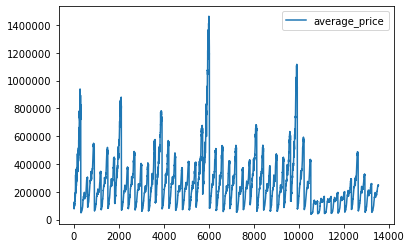

In [54]:
y = df['average_price']
X_num = df[['no_of_crimes', 'houses_sold', 'borough_flag']]
df.plot(kind = 'line',  y = 'average_price')

In [55]:
time = df['date'].str.slice(0,4).astype(int)
time = pd.DataFrame(time)
df = df.assign(date=time)


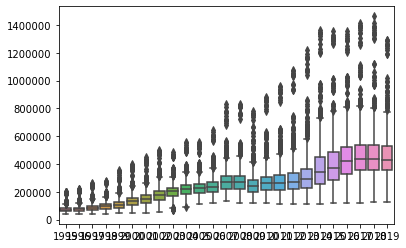

In [107]:
import seaborn as sns
bp = df[['date', 'average_price']]
time = bp['date'].tolist()
price = bp['average_price'].tolist()
sns.boxplot(x =time ,y=price)
